# Removing Unimportant Rates

When you create a network given a list of nuclei, it will pull in all of the rates that connect those nuclei in the library, even if they are not important for the thermodynamic conditions under which the network will be used.

Here we see how to feed a set of thermodynamic conditions to a `RateCollection` and remove the rates that are never important.

Let's consider the case of wanting to model H burning in conditions close to the core of the Sun.  We start by generating a network with all of the pp and CNO nuclei

In [1]:
import pynucastro as pyna

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
h_burn = reaclib_library.linking_nuclei(["h1", "h2", "he3", "he4",
                                         "c12", "c13", "n13", "n14", "n15", "o15"])

In [4]:
rc = pyna.RateCollection(libraries=[h_burn])

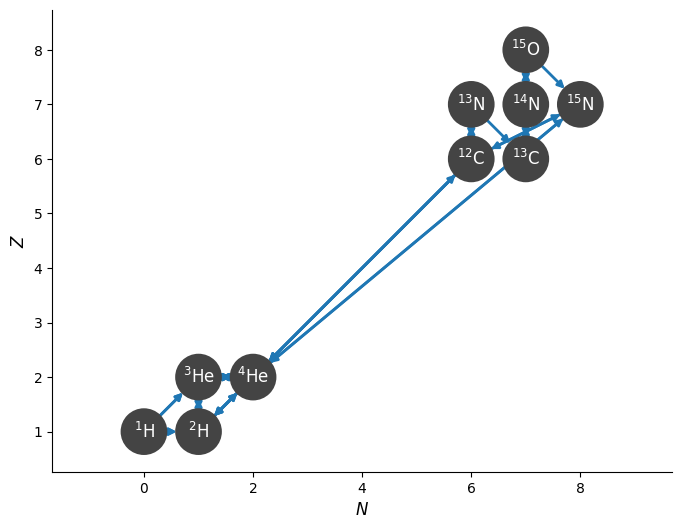

In [5]:
fig = rc.plot(hide_xp=True)

Notice a few things:
    
* The 3-$\alpha$ rate (and its reverse) are included
* Lots of reverse rates are included between the CNO nuclei, but we only expect that the forward rates in the traditional CNO cycle matter

To filter rates we need to pass in a set of thermodynamic conditions, including density and temperature (in CGS units) and a `Composition` object giving the mass fractions

In [6]:
rho = 100
T = 1.5e7
comp = pyna.Composition(rc.get_nuclei())
comp.set_solar_like()

state = (rho, T, comp)

Now we find the rates that are not important.  We pass in a cutoff, such that any rate that is smaller that cutoff $\times$ fastest-rate will be returned

In [7]:
cutoff_ratio = 1.e-20
unimportant_rates = rc.find_unimportant_rates([state], cutoff_ratio)

Here `unimportant_rates` is a dictionary with the rate as the key and the ratio of the rate compared to the fastest rate as the value.

In [8]:
unimportant_rates

{He3 ⟶ p + H2: 0,
 He4 ⟶ 2 H2: 0,
 N13 ⟶ p + C12: 0,
 N14 ⟶ p + C13: 0,
 O15 ⟶ p + N14: 0,
 C12 ⟶ 3 He4: 0,
 p + He4 ⟶ H2 + He3: 0,
 C12 + He4 ⟶ p + N15: 0,
 3 He4 ⟶ C12 + 𝛾: 7.97446353520212e-59,
 2 p + He4 ⟶ 2 He3: 0}

If we are happy with what it found, we can remove them from the `RateCollection`

In [9]:
rc.remove_rates(unimportant_rates)

Now we can look at the updated rate collection.  Notice that the 3-$\alpha$ rate is gone as are a lot of the reverse rates

In [10]:
rc

N13 ⟶ C13 + e⁺ + 𝜈
O15 ⟶ N15 + e⁺ + 𝜈
2 p ⟶ H2 + e⁺ + 𝜈
2 p + e⁻ ⟶ H2 + 𝜈
H2 + p ⟶ He3 + 𝛾
2 H2 ⟶ He4 + 𝛾
He3 + p ⟶ He4 + e⁺ + 𝜈
C12 + p ⟶ N13 + 𝛾
C13 + p ⟶ N14 + 𝛾
N14 + p ⟶ O15 + 𝛾
He3 + H2 ⟶ p + He4
N15 + p ⟶ He4 + C12
2 He3 ⟶ 2 p + He4

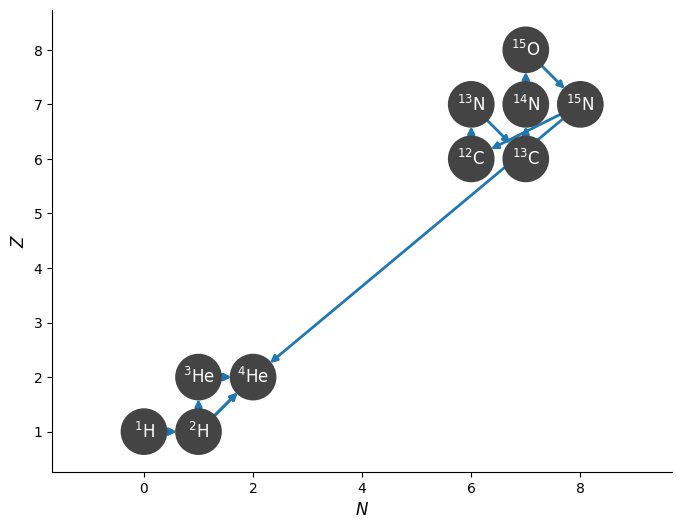

In [11]:
fig = rc.plot(hide_xp=True, always_show_alpha=True)